# Import packages

In [3]:
from __future__ import division
import pandas as pd
import numpy as np
import tat_neuro_functions as tnf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1>Import Data</h1>
<p>This data has been preprocessed in a separate notebook. Missing variables were imputed using a "median" approach, which is designated by the "2" in "sklearn_preprocessed_df2". It contains all potential features, both clinical and genetic, prior to further feature engineering.</p>

In [4]:
df = pd.read_csv('/Users/Greg/Projects/HIV_Neuro_NGS/DataModeling/dataframes/sklearn_preprocessed_df2.csv')
df.head()

,Patient,Visit,Age,Gender,ART,VL,iVL,pVL,CD4,iCD4,...,101F,101P,101S,101T,101W,101Y,101V,log10_VL,log10_iVL,log10_pVL
0,A0001,R09,59.0,Male,on,20.0,987.0,987.0,797.0,400.0,...,0.0,0.000453,0.000356,0.000000,0.000129,0.0,0.001975,1.301030,2.994317,2.994317
1,A0010,R08,59.0,Male,on,20.0,50.0,470.0,1167.0,448.0,...,0.0,0.000000,0.004473,0.001278,0.000000,0.0,0.000000,1.301030,1.698970,2.672098
2,A0012,R02,63.0,Male,on,34.0,2083.0,28550.0,881.0,745.0,...,0.0,0.003399,0.000283,0.000850,0.000000,0.0,0.000142,1.531479,3.318689,4.455606
3,A0013,R09,68.0,Male,on,20.0,144.0,39373.0,771.0,564.0,...,0.0,0.000278,0.003894,0.000278,0.000000,0.0,0.000000,1.301030,2.158362,4.595199
4,A0015,R10,54.0,Male,on,20.0,79074.0,79074.0,561.0,309.0,...,0.0,0.003000,0.000500,0.000400,0.000000,0.0,0.000000,1.301030,4.898034,4.898034


<h2>Clinical Data Representation</h2>
<p>This dataframe only includes clinical data.</p>

In [6]:
clin_cols = ['GDS','TMHDS','Age','Gender','log10_VL','log10_pVL','CD4','nCD4','CD8','nCD8',
             'Years_seropositive','Race_Black', 'Race_Native_Hawaiian', 'Race_White', 'Race_Multiple',
             'Exposure_MSM', 'Exposure_IDU', 'Exposure_blood_transfusion', 'Exposure_heterosexual',
             'Exposure_heterosexual_and_IDU','Exposure_other']

In [7]:
#clin_cols = ['GDS','Age','Gender','CD4','log10_VL','CD8','nCD4','log10_pVL','nCD8','TMHDS']
clin_df = tnf.select_dataframe_columns(df, clin_cols)
clin_df.head()

,GDS,TMHDS,Age,Gender,log10_VL,log10_pVL,CD4,nCD4,CD8,nCD8,...,Race_Black,Race_Native_Hawaiian,Race_White,Race_Multiple,Exposure_MSM,Exposure_IDU,Exposure_blood_transfusion,Exposure_heterosexual,Exposure_heterosexual_and_IDU,Exposure_other
0,0.583333,4.0,59.0,Male,1.301030,2.994317,797.0,400.0,1131.0,1060.0,...,1,0,0,0,0,1,0,0,0,0
1,1.416667,4.0,59.0,Male,1.301030,2.672098,1167.0,448.0,663.0,478.0,...,1,0,0,0,1,0,0,0,0,0
2,0.583333,7.0,63.0,Male,1.531479,4.455606,881.0,403.0,1599.0,888.0,...,1,0,0,0,1,0,0,0,0,0
3,0.000000,6.5,68.0,Male,1.301030,4.595199,771.0,553.0,958.0,958.0,...,1,0,0,0,0,0,0,0,1,0
4,1.333333,8.0,54.0,Male,1.301030,4.898034,561.0,224.0,1607.0,1288.0,...,1,0,0,0,1,1,0,0,0,1


In [12]:
clin_df['Race_Native_Hawaiian']

GDS                                                                        92.8069
TMHDS                                                                          964
Age                                                                           6021
Gender                           MaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFe...
log10_VL                                                                   201.419
log10_pVL                                                                  471.922
CD4                                                                          80167
nCD4                                                                         32577
CD8                                                                         108420
nCD8                                                                         77125
Years_seropositive                                                            2019
Race_Black                                                                     111
Race

# Exploratory Data Analysis

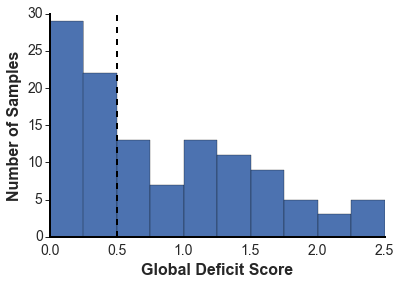

In [9]:
savepath = '/Users/Greg/Projects/HIV_Neuro_NGS/Figures/GDS_histogram.png'
tnf.plot_histogram(clin_df,'GDS','Global Deficit Score',savepath)

In [ ]:
clin_cols = ['Age', 'Years_seropositive', 'TMHDS',
             'Race_Black', 'Race_Native_Hawaiian', 'Race_White', 'Race_Multiple',
             'Exposure_MSM', 'Exposure_IDU', 'Exposure_blood_transfusion', 'Exposure_heterosexual',
             'Exposure_heterosexual_and_IDU','Exposure_other', 'GDS']

In [13]:
def plot_clinical_boxplots(DF, impaired_df, nonimpaired_df, savepath):
    """creats boxplots of typical clinical parameters"""
    fig,ax = plt.subplots(2,3,figsize=(12,7))
    clin_cols = ['CD4','log10_VL','CD8','nCD4','log10_pVL','nCD8']
    plot_titles = ['CD4 count','Viral Load','CD8 count',
                   'Nadir CD4','Peak Viral Load','Nadir CD8']
    x,y,t = 0,0,0
    for feature in DF[clin_cols]:
        impaired_list = list(impaired_df[feature])
        nonimpaired_list = list(nonimpaired_df[feature])
        ax[x,y].tick_params(axis='x', labelsize=14)
        ax[x,y].tick_params(axis='y', labelsize=14, length=5)
        ax[x,y].yaxis.tick_left()
        ax[x,y].set_title(plot_titles[t], size=18)
        ax[x,y].set_xticklabels('')
        ax[x,y].boxplot([impaired_list, nonimpaired_list])
        # formatting
        ax[x,y].spines['left'].set_visible(True)
        ax[x,y].spines['left'].set_color('black')
        ax[x,y].spines['left'].set_linewidth(2)
        ax[x,y].spines['bottom'].set_visible(True)
        ax[x,y].spines['bottom'].set_color('black')
        ax[x,y].spines['bottom'].set_linewidth(2)
        ax[x,y].set_axis_bgcolor('white')
        t += 1
        if x<=1:
            ax[x,y].set_xticklabels(['GDS $\geq$ 0.5', 'GDS $<$ 0.5'], size=16)
        else:
            ax[x,y].set_xticklabels(['', '']) 
        #update x and y coordinates
        if y!=2:
            y+=1
        else:
            y=0
            x+=1
    ax[0,0].set_ylabel('cells/uL')
    ax[0,1].set_ylabel('Log10(copies/mL)')
    ax[0,2].set_ylabel('cells/uL')
    ax[1,0].set_ylabel('cells/uL')
    ax[1,1].set_ylabel('Log10(copies/mL)')
    ax[1,2].set_ylabel('cells/uL')
    #plt.show()
    fig.tight_layout()
    fig.savefig(savepath, dpi=300)

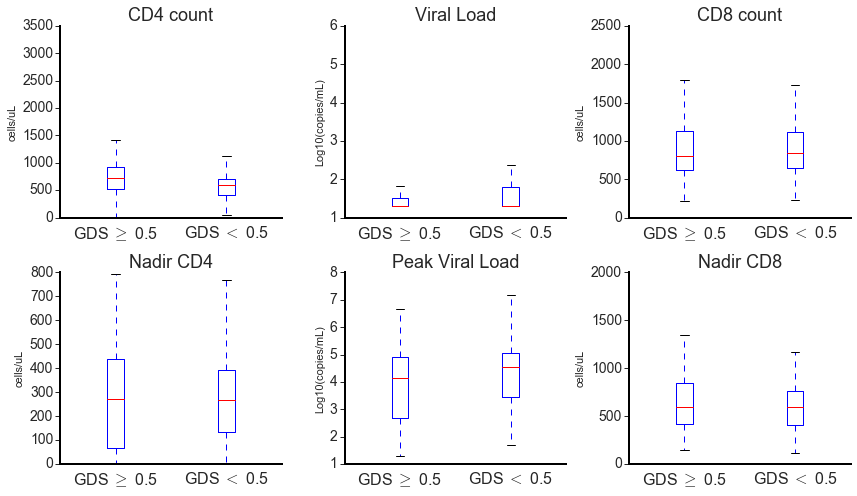

In [14]:
savepath = '/Users/Greg/Projects/HIV_Neuro_NGS/Figures/clinical_boxplots.png'
impaired_df, nonimpaired_df = tnf.split_df_by_impairment(clin_df, 0.5)
plot_clinical_boxplots(clin_df, impaired_df, nonimpaired_df, savepath)

# Pie Charts - Race and Exposure

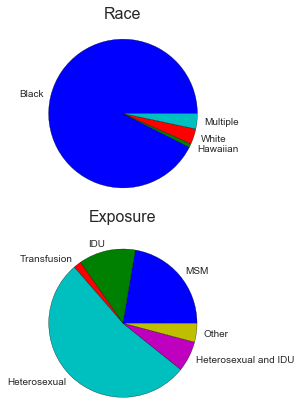

In [80]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20

race_labels = ['Black', 'Hawaiian', 'White', 'Multiple']
exposure_labels = ['MSM', 'IDU', 'Transfusion', 'Heterosexual',
                 'Heterosexual and IDU','Other']

sizes_race = [111, 1, 4, 4]
sizes_exposure = [27, 15, 2, 64,8, 5]

fig, ax = plt.subplots(2,1, figsize=[3,6])
ax[0].pie(sizes_race, labels=race_labels, startangle=0)
ax[0].axis('equal')
ax[0].set_title('Race', size=16, y=1.1)

ax[1].pie(sizes_exposure, labels=exposure_labels)
ax[1].axis('equal')
ax[1].set_title('Exposure', size=16, y=1.15)

plt.tight_layout(pad=1)
plt.show()

# Run Preparation Pipeline tests

In [96]:
target = 'GDS'
threshold = 0.5
features = ['Age','Gender','log10_VL','log10_pVL','CD4','nCD4','CD8','nCD8',
            'Years_seropositive','Race_Black', 'Race_Native_Hawaiian', 'Race_White', 'Race_Multiple',
            'Exposure_MSM', 'Exposure_IDU', 'Exposure_blood_transfusion', 'Exposure_heterosexual',
            'Exposure_heterosexual_and_IDU','Exposure_other']

X, y = tnf.run_preparation_pipeline(clin_df, features, target, threshold)
X.head()

,Age,log10_VL,log10_pVL,CD4,nCD4,CD8,nCD8,Years_seropositive,Race_Black,Race_Native_Hawaiian,Race_White,Race_Multiple,Exposure_MSM,Exposure_IDU,Exposure_blood_transfusion,Exposure_heterosexual,Exposure_heterosexual_and_IDU,Exposure_other,Gender_Male
0,0.977462,-0.450448,-0.780043,0.286021,0.598424,0.478651,1.112201,0.275913,0.232495,-0.092848,-0.188144,-0.188144,-0.547723,2.607681,-0.131876,-1.098885,-0.270914,-0.211289,0.776363
1,0.977462,-0.450448,-1.021905,1.232499,0.834713,-0.617639,-0.502773,0.592401,0.232495,-0.092848,-0.188144,-0.188144,1.825742,-0.383482,-0.131876,-1.098885,-0.270914,-0.211289,0.776363
2,1.496115,-0.203587,0.316819,0.500897,0.613192,1.574941,0.634923,2.016596,0.232495,-0.092848,-0.188144,-0.188144,1.825742,-0.383482,-0.131876,-1.098885,-0.270914,-0.211289,0.776363
3,2.144432,-0.450448,0.421599,0.219511,1.351597,0.073398,0.829164,-0.198819,0.232495,-0.092848,-0.188144,-0.188144,-0.547723,-0.383482,-0.131876,-1.098885,3.691206,-0.211289,0.776363
4,0.329145,-0.450448,0.648911,-0.317679,-0.267972,1.593681,1.744872,1.383620,0.232495,-0.092848,-0.188144,-0.188144,1.825742,2.607681,-0.131876,-1.098885,-0.270914,4.732864,0.776363


In [110]:
def get_covariate_matrix(DF, features, target, threshold, savepath):
    label_dict = {'CD4':'CD4 count', 'Age':'Age','log10_VL':'log10 VL',
    'Gender_Male':'Gender','nCD8':'nadir CD8','CD8':'CD8 count',
    'nCD4':'nadir CD4', 'log10_pVL':'log10 peak VL',
    'Years_seropositive':'Years Seropositive',
    'Race_Black':'Race Black', 'Race_Native_Hawaiian':'Race Hawaiian',
    'Race_White':'Race White','Race_Multiple':'Race Multiple',
    'Exposure_MSM':'MSM', 'Exposure_IDU':'IDU', 'Exposure_blood_transfusion':'Transfusion',
    'Exposure_heterosexual':'Heterosexual','Exposure_heterosexual_and_IDU':'Heterosexual and IDU',
    'Exposure_other':'Other exposure'}
                 
    
    X, y = tnf.run_preparation_pipeline(DF, features, target, threshold)
    X.columns = [label_dict[c] for c in X.columns if c in list(label_dict.keys())]
    plt.figure(figsize=(8.5, 8.5))
    sns.set(font_scale=1.5)
    ax = sns.heatmap(X.corr(), square=True)
    ax.yaxis.set_label_position('right')
    ax.set_ylabel('Pearson Correlation Coefficient',fontsize=20, weight='bold', labelpad=90)
    #ax.ylabel('Pearson Correlation Coefficient')
    plt.tight_layout()
    plt.savefig(savepath, dpi=300)
    plt.show()

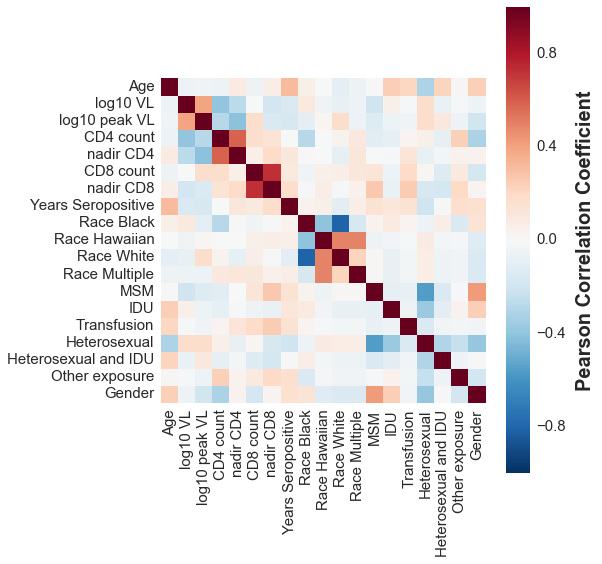

In [111]:
target = 'GDS'
threshold = 0.5
#features = ['Age','Gender','log10_VL','log10_pVL','CD4','nCD4','CD8','nCD8']

features = ['Age','Gender','log10_VL','log10_pVL','CD4','nCD4','CD8','nCD8',
            'Years_seropositive','Race_Black', 'Race_Native_Hawaiian', 'Race_White', 'Race_Multiple',
            'Exposure_MSM', 'Exposure_IDU', 'Exposure_blood_transfusion', 'Exposure_heterosexual',
            'Exposure_heterosexual_and_IDU','Exposure_other']

savepath = '/Users/Greg/Projects/HIV_Neuro_NGS/Figures/clinical_covar_matrix.png'
get_covariate_matrix(clin_df, features, target, threshold, savepath)